<a href="https://colab.research.google.com/github/ViniciusChelli/Arduino/blob/main/IC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers transformers safetensors accelerate

In [3]:
from diffusers import DiffusionPipeline, StableDiffusionPipeline, EulerDiscreteScheduler, StableDiffusionImageVariationPipeline
import torch
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
from io import BytesIO
import requests

In [4]:
pretrained_model_or_path = "CompVis/ldm-celebahq-256"
pipeline = DiffusionPipeline.from_pretrained(pretrained_model_or_path)
imagem = pipeline(num_inference_steps=50).images[0]
pretrained_model_or_path ="stabilityai/stable-diffusion-xl-base-1.0"
prompt = "a 2d pixel art of a frog"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

The config attributes {'timestep_values': None, 'timesteps': 1000} were passed to DDIMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


  0%|          | 0/50 [00:00<?, ?it/s]

In [5]:
pipeline = DiffusionPipeline.from_pretrained(pretrained_model_or_path,
                                         torch_dtype=torch.float16, use_safetensors=True).to("cuda")
#fatiamento de atenção reduz o uso de memória
pipeline.enable_attention_slicing()
imagem = pipeline(prompt=prompt).images[0]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

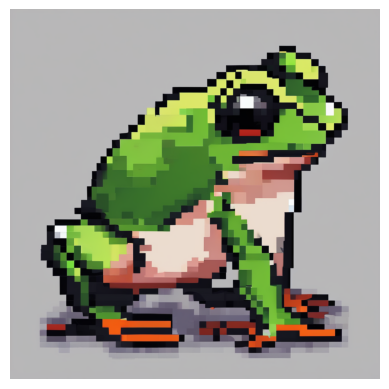

In [6]:
plt.axis('off')
plt.imshow(imagem)
plt.show()